## togo Solar Data – Exploratory Data Analysis (EDA)


### Objective:

Profile, clean, and explore each country’s solar dataset end-to-end so it’s ready for comparison and region-ranking tasks.

### 1. Summary Statistics & Missing-Value Report
### 2. Outlier Detection & Basic Cleaning

In [5]:
import pandas as pd
import numpy as np

# Load dataset (example path, adjust if needed)
df = pd.read_csv("../data/raw/togo-dapaong_qc.csv", parse_dates=["Timestamp"])

# Quick look

# data\raw\sierraleone-bumbuna.csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [6]:
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


In [7]:
missing = df.isna().sum()
missing_percent=missing/len(df) *100
print(missing) # found out Comments has values that are all null


df.drop('Comments',axis=1,inplace=True)
df

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56:00,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0
525596,2022-10-24 23:57:00,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0
525597,2022-10-24 23:58:00,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9
525598,2022-10-24 23:59:00,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8


In [8]:
from scipy.stats import zscore

# Select numeric columns for outlier detection
cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute Z-scores
z_scores = np.abs(df[cols_to_check].apply(zscore, nan_policy='omit'))
mask = (z_scores > 3).any(axis=1)
print(f"Outlier rows: {mask.sum()}")
z_scores[(mask)]
df_clean=df[~(mask)]
df_clean
# df[mask]

Outlier rows: 9251


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56:00,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0
525596,2022-10-24 23:57:00,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0
525597,2022-10-24 23:58:00,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9
525598,2022-10-24 23:59:00,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8


In [9]:

df_clean.to_csv("../data/processed/togo_clean.csv", index=False)
# Note: data/ is in .gitignore, so CSV won’t be committed



# df = pd.read_csv("../data/raw/benin-malanville.csv", parse_dates=["Timestamp"])

 ### 3. Timeseries Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


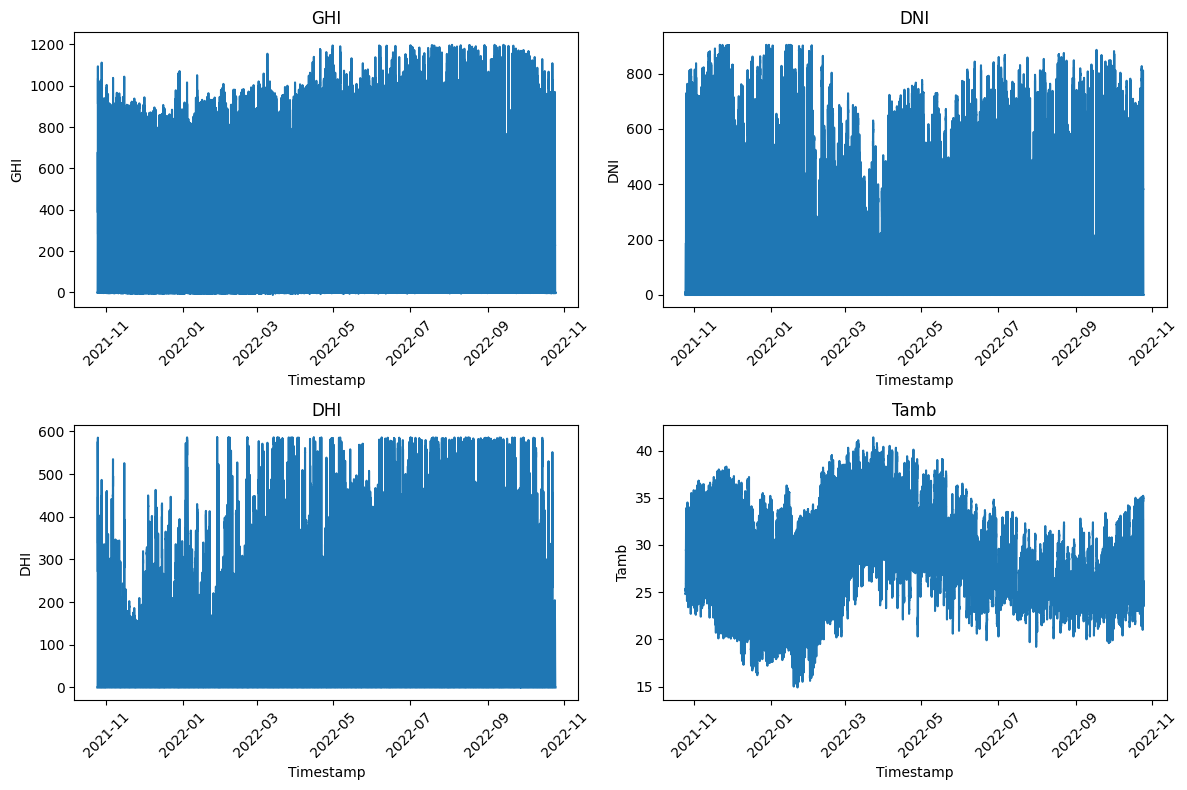

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
y_values = ["GHI", "DNI", "DHI", "Tamb"]

for i, col in enumerate(y_values):
    sns.lineplot(x="Timestamp", y=col, data=df_clean, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [12]:
df_clean = df_clean.copy()
df_clean["DayOfWeek"] = df_clean["Timestamp"].dt.day_name()
df_clean["Month"] = df_clean["Timestamp"].dt.month_name()
df_clean["Year"] = df_clean["Timestamp"].dt.year
df_clean.loc[:, "Hour"] = df_clean["Timestamp"].dt.hour

In [13]:

def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df_clean.loc[:, "TimeOfDay"] = df_clean["Hour"].apply(get_time_of_day)

In [14]:

df_clean

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,BP,Cleaning,Precipitation,TModA,TModB,DayOfWeek,Month,Year,Hour,TimeOfDay
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,...,977,0,0.0,24.7,24.4,Monday,October,2021,0,Night
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,...,977,0,0.0,24.7,24.4,Monday,October,2021,0,Night
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,...,977,0,0.0,24.7,24.4,Monday,October,2021,0,Night
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,...,977,0,0.0,24.7,24.4,Monday,October,2021,0,Night
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,...,977,0,0.0,24.7,24.4,Monday,October,2021,0,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56:00,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,...,977,0,0.0,24.3,24.0,Monday,October,2022,23,Night
525596,2022-10-24 23:57:00,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,...,977,0,0.0,24.3,24.0,Monday,October,2022,23,Night
525597,2022-10-24 23:58:00,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,...,977,0,0.0,24.2,23.9,Monday,October,2022,23,Night
525598,2022-10-24 23:59:00,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,...,977,0,0.0,24.1,23.8,Monday,October,2022,23,Night


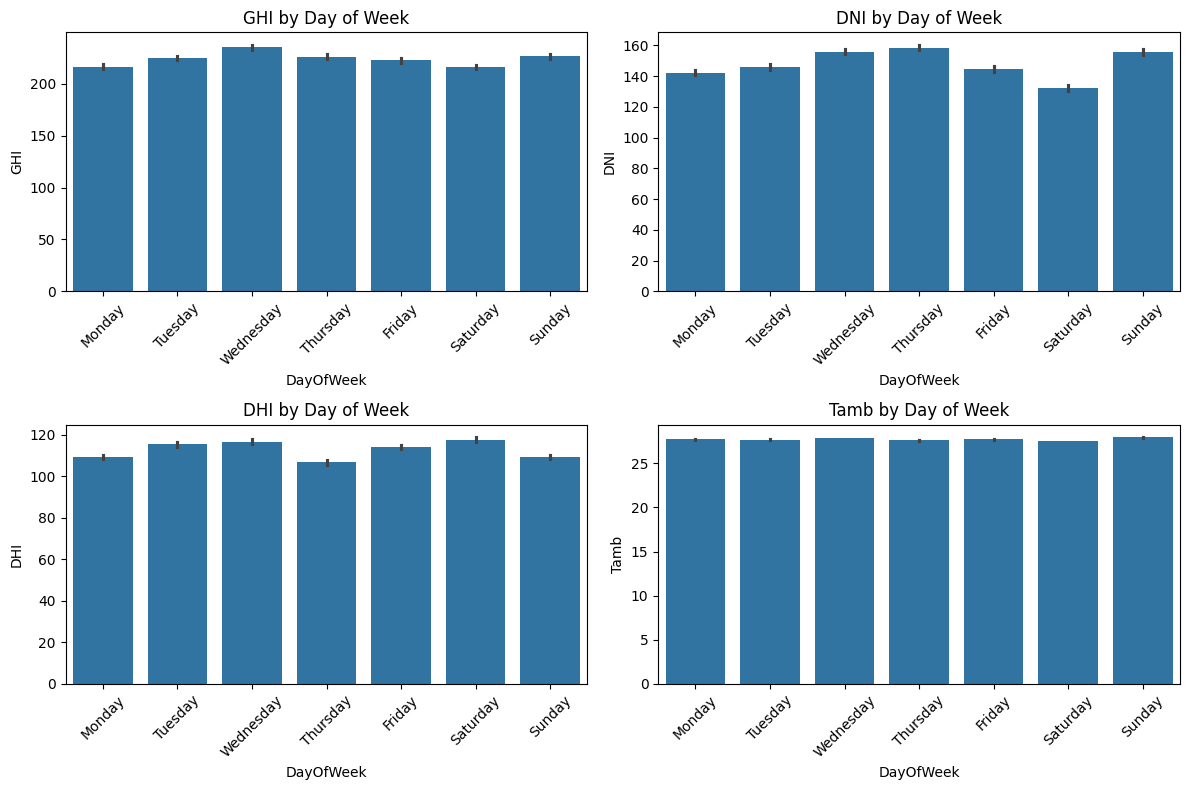

In [15]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(["GHI", "DNI", "DHI", "Tamb"]):
    sns.barplot(x="DayOfWeek", y=col, data=df_clean, ax=axes[i], order=day_order)
    axes[i].set_title(f"{col} by Day of Week")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

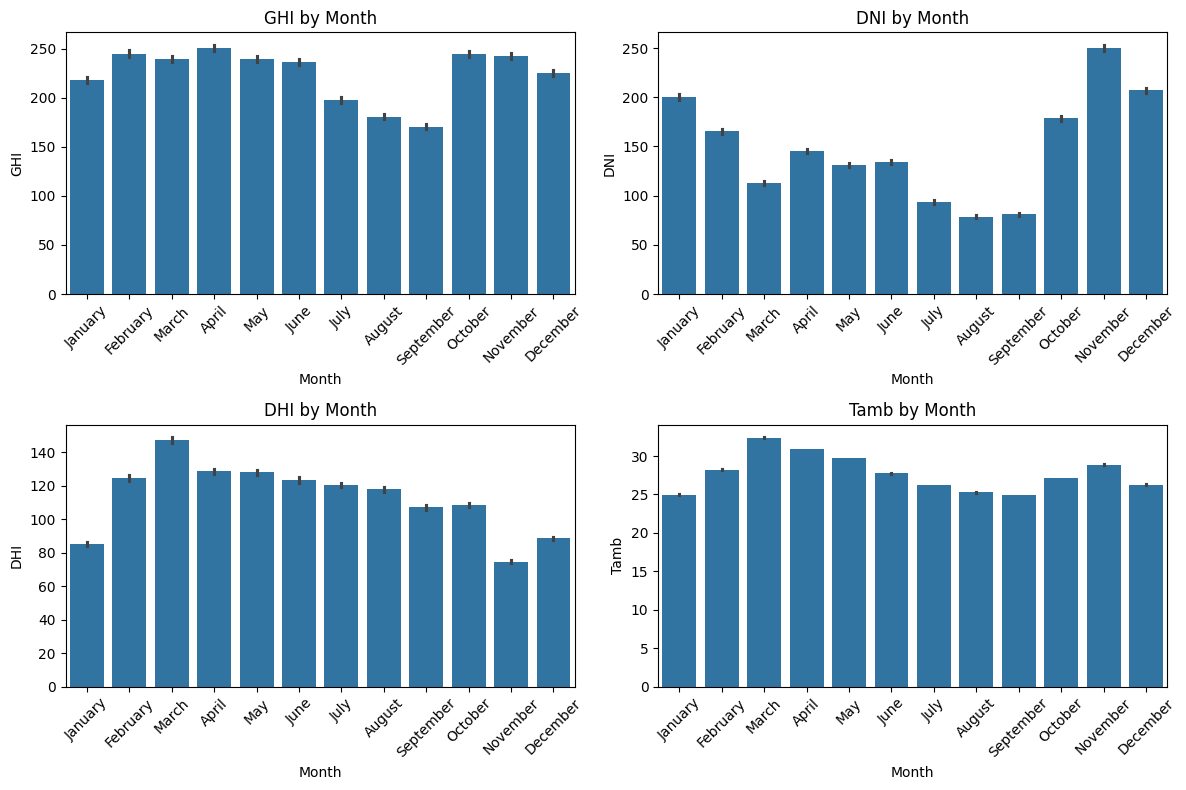

In [16]:
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(["GHI", "DNI", "DHI", "Tamb"]):
    sns.barplot(x="Month", y=col, data=df_clean, ax=axes[i], order=month_order)
    axes[i].set_title(f"{col} by Month")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

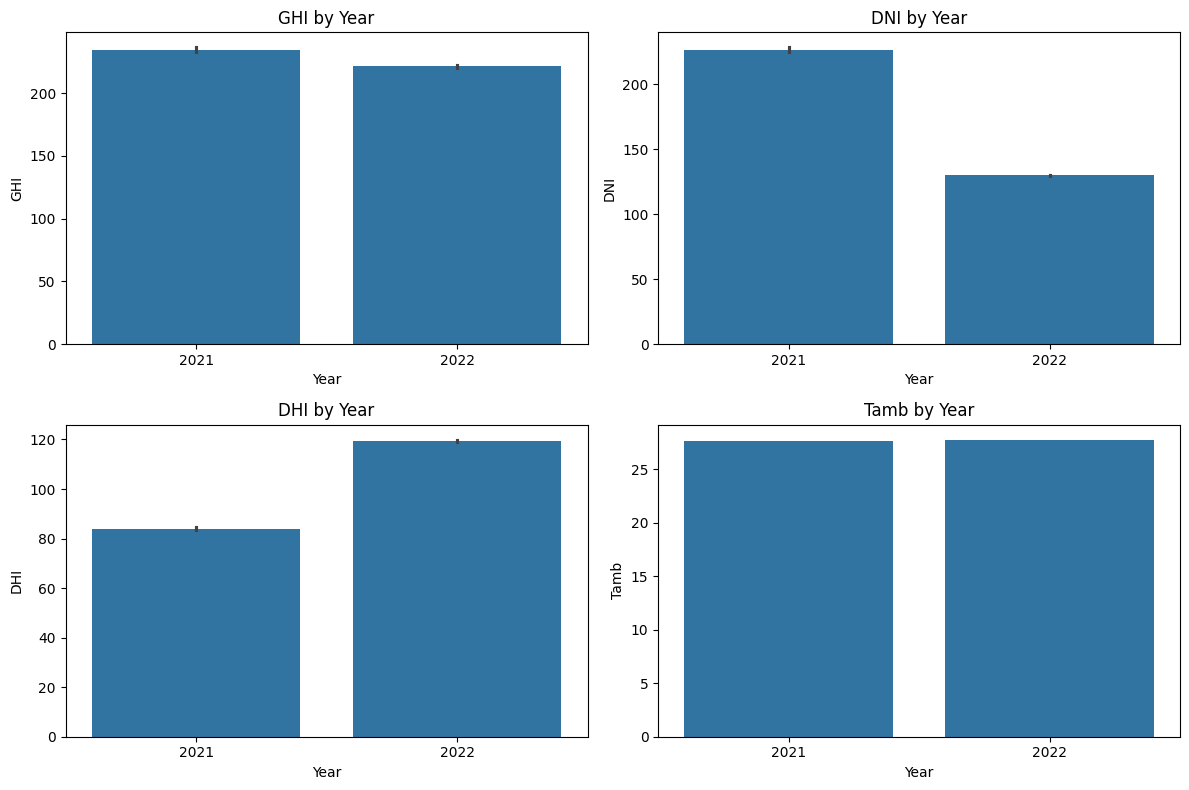

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(["GHI", "DNI", "DHI", "Tamb"]):
    sns.barplot(x="Year", y=col, data=df_clean, ax=axes[i])
    axes[i].set_title(f"{col} by Year")

plt.tight_layout()
plt.show()

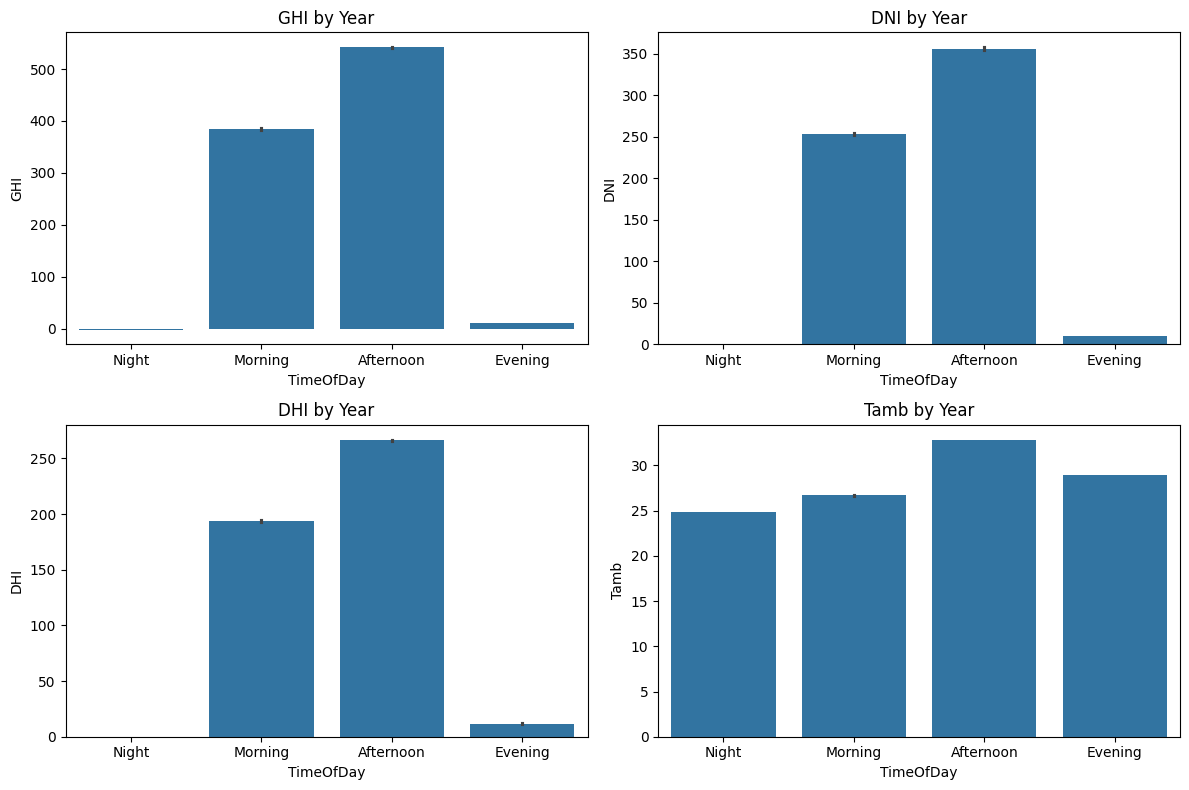

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(["GHI", "DNI", "DHI", "Tamb"]):
    sns.barplot(x="TimeOfDay", y=col, data=df_clean, ax=axes[i])
    axes[i].set_title(f"{col} by Year")

plt.tight_layout()
plt.show()

### 4. Cleaning Impact

In [19]:
df_clean.groupby('Cleaning').count()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WDstdev,BP,Precipitation,TModA,TModB,DayOfWeek,Month,Year,Hour,TimeOfDay
Cleaning,,,,,,,,,,,,,,,,,,,,,
0,516076,516076,516076,516076,516076,516076,516076,516076,516076,516076,...,516076,516076,516076,516076,516076,516076,516076,516076,516076,516076
1,273,273,273,273,273,273,273,273,273,273,...,273,273,273,273,273,273,273,273,273,273


### 5. Correlation & Relationship Analysis

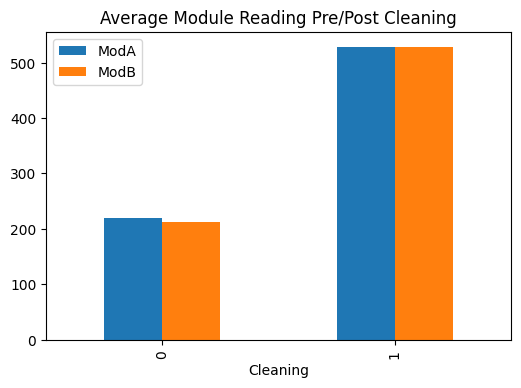

In [20]:
cleaning_avg = df_clean.groupby("Cleaning")[["ModA", "ModB"]].mean()
cleaning_avg.plot(kind="bar", figsize=(6,4))
plt.title("Average Module Reading Pre/Post Cleaning")
plt.show()

In [21]:
corr=df_clean[["GHI","DNI","DHI","TModA","TModB"]].corr()
threshold = 0.8

# Create a mask for correlations above the threshold (excluding diagonal)
mask_corr = (np.abs(corr) > threshold) & (corr != 1.0)

# Display pairs with high correlation
high_corr = corr[mask_corr]

# Drop rows and columns with all False/NaN to focus on actual correlations
high_corr = high_corr.dropna(how='all').dropna(axis=1, how='all')

print("Highly correlated feature pairs:")
print(high_corr)


# multicollinearity between TModA and TmodB and also between TModA and DHI,DNI , between TModB and DHI,DNI,GHI and DNI,DHI and 

Highly correlated feature pairs:
            GHI       DNI       DHI     TModA     TModB
GHI         NaN  0.883584  0.856041  0.900358  0.920828
DNI    0.883584       NaN       NaN       NaN       NaN
DHI    0.856041       NaN       NaN  0.807605  0.826213
TModA  0.900358       NaN  0.807605       NaN  0.985076
TModB  0.920828       NaN  0.826213  0.985076       NaN


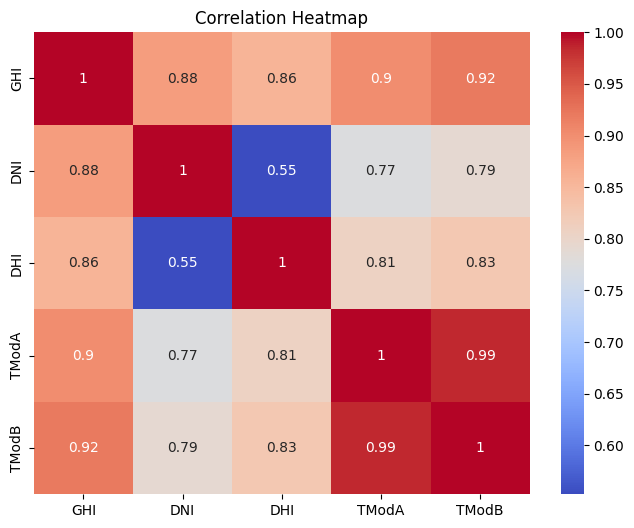

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[["GHI","DNI","DHI","TModA","TModB"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

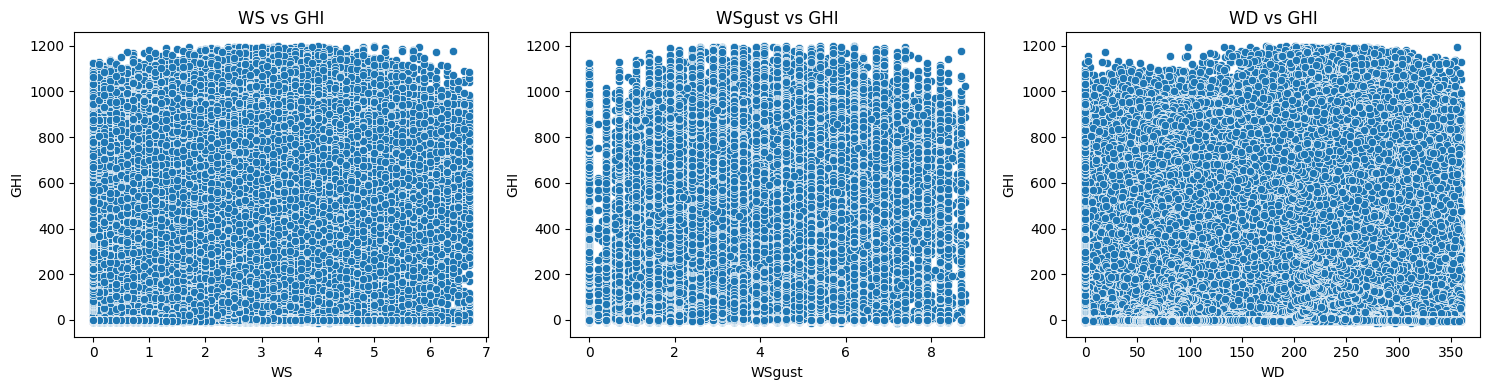

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.scatterplot(x="WS", y="GHI", data=df_clean, ax=axes[0])
axes[0].set_title("WS vs GHI")

sns.scatterplot(x="WSgust", y="GHI", data=df_clean, ax=axes[1])
axes[1].set_title("WSgust vs GHI")

sns.scatterplot(x="WD", y="GHI", data=df_clean, ax=axes[2])
axes[2].set_title("WD vs GHI")

plt.tight_layout()
plt.show()

<Axes: xlabel='TModA', ylabel='TModB'>

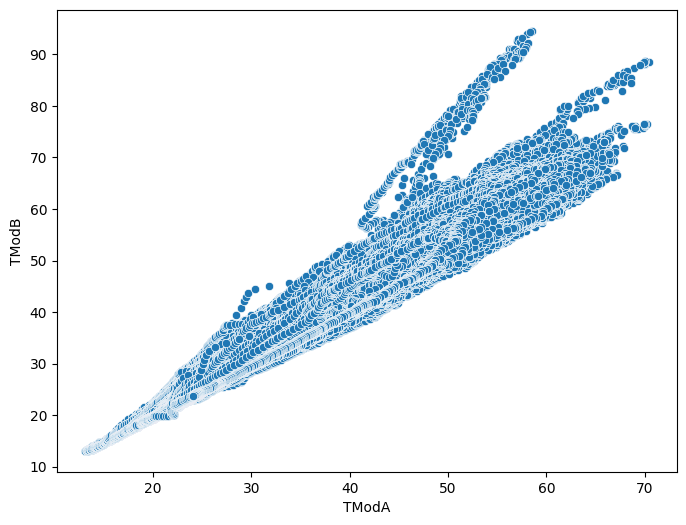

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="TModA", y="TModB", data=df_clean)

### 6. Wind & Distribution Analysis

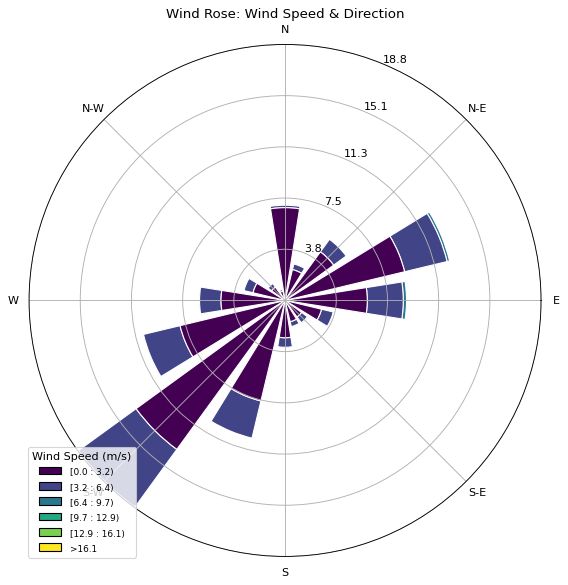

In [26]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Create wind rose
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose: Wind Speed & Direction")
plt.show()

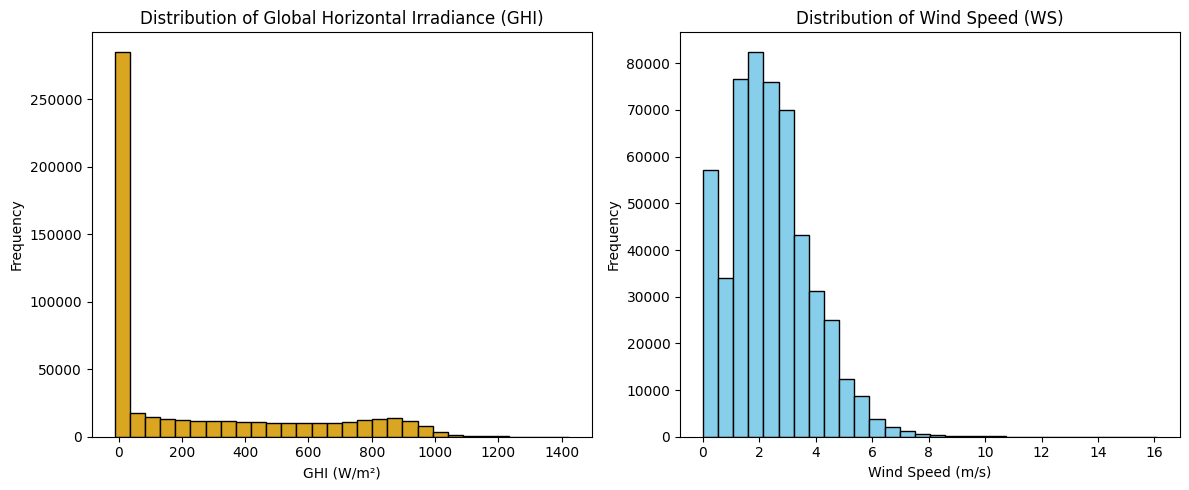

In [27]:
import matplotlib.pyplot as plt

# Histogram for GHI
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, color='goldenrod', edgecolor='black')
plt.title("Distribution of Global Horizontal Irradiance (GHI)")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Frequency")

# Histogram for Wind Speed (WS)
plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Wind Speed (WS)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

7. Temperature Analysis

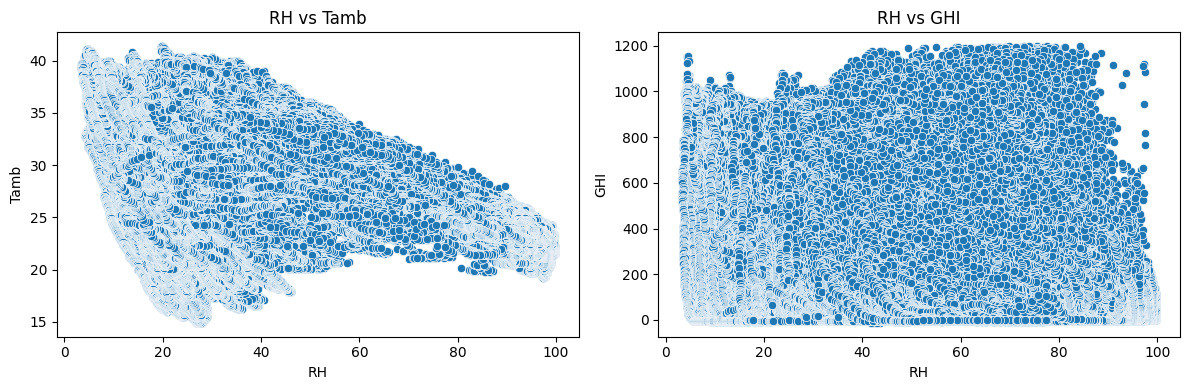

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x="RH", y="Tamb", data=df_clean, ax=axes[0])
axes[0].set_title("RH vs Tamb")

sns.scatterplot(x="RH", y="GHI", data=df_clean, ax=axes[1])
axes[1].set_title("RH vs GHI")

plt.tight_layout()
plt.show()

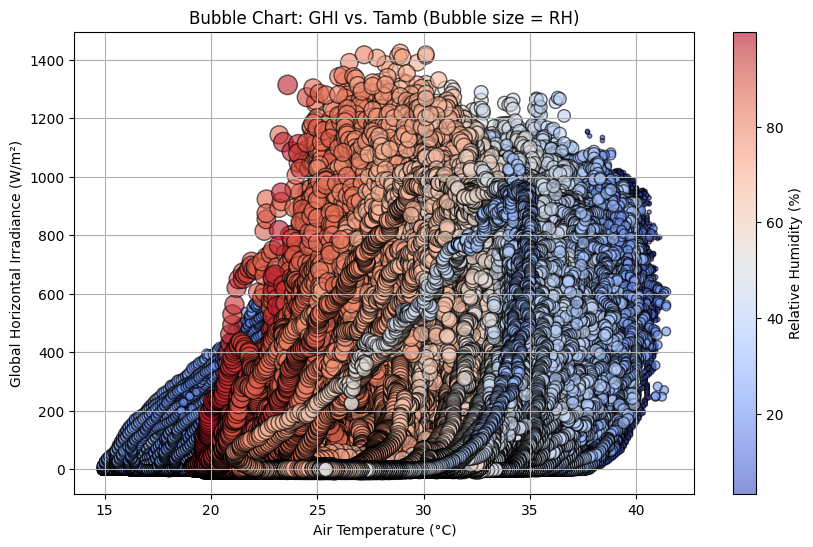

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Bubble chart with bubble size proportional to Relative Humidity
plt.scatter(df['Tamb'], df['GHI'], 
            s=df['RH']*2,       # bubble size scaled by RH
            c=df['RH'],         # color mapped to RH
            cmap='coolwarm', 
            alpha=0.6, edgecolor='k')

plt.title("Bubble Chart: GHI vs. Tamb (Bubble size = RH)")
plt.xlabel("Air Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.colorbar(label="Relative Humidity (%)")
plt.grid(True)
plt.show()